### Mi primer red Neuronal utilizando Python y el modulo Tensorflow.

> El objetivo es utilizar una red neuronal simple, que cumpla una función y nos permita ver cómo funciona. 

In [3]:
import tensorflow as tf
import numpy as np

In [5]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [6]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [7]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [8]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


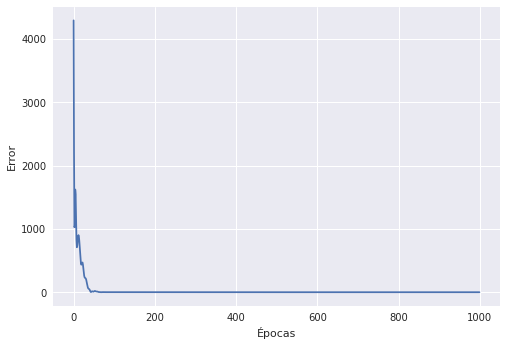

In [9]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.plot(historial.history['loss'])


In [10]:
print('Hagamos una predicción!')
result = modelo.predict([100.0])
print('El resultado es: ', result, 'grados Fahrenheit')

Hagamos una predicción!
El resultado es:  [[211.74745]] grados Fahrenheit


In [11]:
print('variables internas del modelo')
# print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

variables internas del modelo
[array([[-0.573169  , -0.10135947,  0.14896137]], dtype=float32), array([-4.0451455,  1.4646028,  3.7486165], dtype=float32)]
[array([[-1.1937678 ,  0.34098122,  1.1807582 ],
       [ 0.4497821 ,  0.14872548,  0.18814825],
       [ 0.6764175 ,  0.7272025 , -0.83386177]], dtype=float32), array([ 3.7559278,  2.2085001, -3.9528847], dtype=float32)]
[array([[ 1.3371108 ],
       [ 0.19157399],
       [-1.0107396 ]], dtype=float32), array([3.7756746], dtype=float32)]
